# Table of Contents:

- [Importing Libraries and Data](#Importing)


- [Data Exploration:](#Exploration)
    - [Checking Normal Distribution of Data](#distribution-check)
    - Describe shape, describe, etc.....
    - [Summary of Findings](#exploration-summary)
    
    
- [Data Cleaning:](#Cleaning)
    - [Checking for Duplicates:](#duplicates) 
    - [Coverting Datatypes:](#Converting-Datatypes)
        - [Date to Datetime Format](#convert_datetime)
    - [Dealing With Missing and Extraneous Values:](#Missing) 
       - ['yr_renovated'](#cleaning_yr_renovated)
       - ['sqft_basement'](#cleaning_sqft_basement)
    - [Dummy Coding Categorical Variables:](#Dummy-Coding)
        - ['Zip Code'](#Dummy-Zip)
        - ['Waterfront'](#dummy_waterfront)


- [Model Decisions:](#model-decisions) 
    - [Correlation Matrices](#corr-matrices) 
    - [Checking for Linear Assumptions:](#linear-assumption) 
  

- [Training and Testing Our MultiLinear Regression Model:](#train-test-mlr)
    - [Model 1](#model-1)
    - [Model 2](#model-2) 


- [Summary of Findings:](#conclusion)
    

<a id="Importing"></a>
# Importing Libraries and Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-v2-mod1-final-project-dc-ds-career-042219/master/kc_house_data.csv')


<a id="Exploration"></a>
# Data Exploration:

In [2]:
df.shape

(21597, 21)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.head().T
#transposed so we can see each column heading with example values.

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [5]:
df.describe().round(decimals=2).T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.00,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.00,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.370000e+00,9.300000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.120000e+00,7.700000e-01,0.50,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080320e+03,9.181100e+02,370.00,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.00,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.490000e+00,5.400000e-01,1.00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,1.000000e-02,9.000000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.300000e-01,7.700000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.410000e+00,6.500000e-01,1.00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


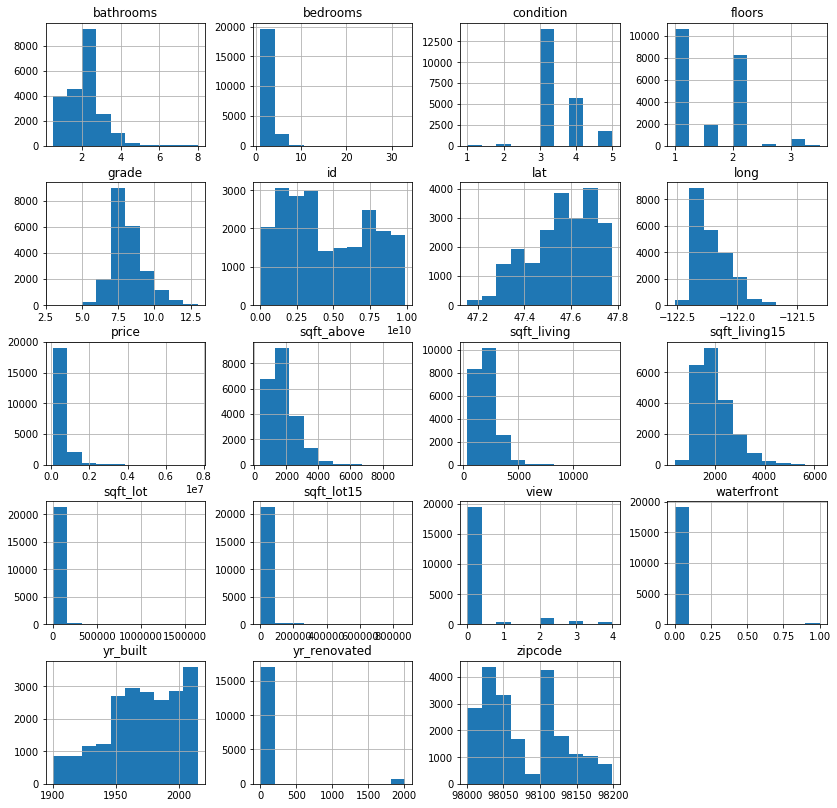

In [7]:
#checking for normal distribution of data 

import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (14,14))
ax = fig.gca()
df.hist(ax = ax);

<a id="exploration-summary"></a>
## Summary of Exploratory Findings:

#### Normal Distribution:

We noticed from looking at the histogram of price that all but 11 houses had a price range of $4 million or less. Since these houses only accounted for 0.05 percent of the total number of records in our dataset, we decided to drop these outliers from our final dataset for our model. Keeping these records in could cause our model to **underfit? 

#### Ambiguous Data: Several variables are ambiguous in nature, and will require interpretation to our best ability. These include:
- waterfront = if the property has a view to the waterfront
- view = "has been viewed" (scale of 0-4, predominately 0)
- condition = overall state of condition (1-5)
- grade = king's grading system (only 3-13 shown, might be on a larger range)
- sqft_living15/lot15 = sqft of living/lot area of 15 closest neighbors

#### Converting Missing/Extraneous Values: Several variables have missing or extraneous values that will need to be converted in order to be entered into our regression model

<a id="Cleaning"></a>
# Data Cleaning:

## Dropping Data

In [8]:
#dropping rows where price > $4m due to outliers seen in above histogram

#cut_off_price = 4000000
#df_cleaned = df_cleaned[df_cleaned['price']<cut_off_price]

In [9]:
#creating a new dataframe for cleaned variables 
df_cleaned = df

<a id="duplicates"></a>
## Checking for Duplicates:

In [10]:
df_cleaned.shape

(21597, 21)

In [11]:
df_cleaned.nunique().sort_values(ascending=False)
#Since there are fewer unique IDs than the length of our database, we can assume that there are duplicates

id               21420
sqft_lot          9776
sqft_lot15        8682
lat               5033
price             3622
sqft_living       1034
sqft_above         942
sqft_living15      777
long               751
date               372
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
bathrooms           29
bedrooms            12
grade               11
floors               6
condition            5
view                 5
waterfront           2
dtype: int64

In [12]:
df_cleaned[df_cleaned.duplicated()]
#output: it appears that there are no rows that are exactly the same


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [13]:
#viewing duplicated rows
df_cleaned[df_cleaned['id'].duplicated(keep = False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
345,3969300030,7/23/2014,165000.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,0.0,98178,47.4897,-122.240,1020,7138
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,...,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
371,2231500030,10/1/2014,315000.0,4,2.25,2180,10754,1.0,NaN,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,...,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [25]:
df_cleaned[df_cleaned['id'].duplicated()].shape
#when we check for duplicates with the ID column.  we have 177 rows with duplicated IDs.  this matches up with 21597-21420=177
#e.g. rows 93 and 94 show that in 5 months house value went up 270,000.  but all other values are the same.
#suggests there was either bad data collection OR a quick rennovation and bump up the selling price.  

# dates from 2014-2015 and only 177 have managed to be sold twice in that time window

#1st value could be undervalued, e.g. foreclosure market
#2nd value could be overvalued, wont be reflected in variables, e.g. now has solar panels

#possible solutions: take 1st value, take latest value, take the mean, or keep all data.
#best idea is to leave them both

(177, 21)

<a id="Converting-Datatypes"></a>
## Converting Datatypes:

<a id="datetime"></a>
### Converting 'date' to datetime format:

In [26]:
#converted the 'date' column from object to datetime format
pd.to_datetime(df_cleaned['date'], format="%m/%d/%Y").head(3)


0   2014-10-13
1   2014-12-09
2   2015-02-25
Name: date, dtype: datetime64[ns]

<a id="Missing"></a>
## Checking for Missing and Extraneous Values:

In [14]:
df_cleaned.isna().sum().sum()
#Check first if there is any na values.  we find that there's 6281 na values

6281

In [15]:
df_cleaned.isna().sum().sort_values(ascending=False)
#We can see from this that the columns for yr_renovated and waterfront have a lot of na values.  view only has some

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

In [16]:
df_cleaned['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [17]:
# replaced the NaN values in 'waterfront' with the value 2.
df_cleaned['waterfront'] = df_cleaned['waterfront'].replace(np.nan,2)

In [18]:
#df_cleaned up to date til this stage
df_cleaned.shape

(21597, 21)

<a id="cleaning_yr_renovated"></a>
### Examining Missing Data in 'yr_renovated':

In [19]:
df_cleaned['yr_renovated'].value_counts().head()


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64


###### We can see from this that almost 96% of values in this column are '0'.  This column therefore doesn't offer much value
###### This is in addition to the NA values shown before
###### We can assume its bad data as when we look at duplicates and "quick rennovation" idea, the yr_renovated column is often == 0


<a id="cleaning_sqft_basement"></a>
### Replacing Nan and Extraneous Values in 'sqft_basement':

In [20]:
#Check for extraenuous values
df_cleaned['sqft_basement'].sort_values(ascending=False).head(2)
#displays top two rows - we can see that there are ? values

19234    ?
6410     ?
Name: sqft_basement, dtype: object

In [21]:
#creating a new temporary dataframe of sqft_basement, that doesn't include nan or '?'
df_sqft_no_nan = df_cleaned[(~df_cleaned['sqft_basement'].isna()) & (df_cleaned['sqft_basement'] != '?')]

In [22]:
# How many nan and '?' values have we dropped? 
len(df) - len(df_sqft_no_nan)

454

In [23]:
#can see that nan values in sqft_basement have been dropped from this dataframe
#e.g. row/index 6
df_sqft_no_nan['sqft_basement'].head(8)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
7       0.0
8     730.0
Name: sqft_basement, dtype: object

In [24]:
#convert whole column to int64 format
df_sqft_no_nan['sqft_basement'] = df_sqft_no_nan['sqft_basement'].astype(float)

df_sqft_no_nan['sqft_basement'].dtype
#shows that the df_sqft_no_nan is dtype int64

dtype('float64')

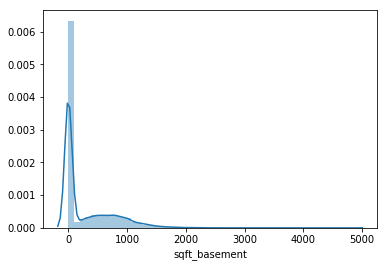

In [25]:
sns.distplot(df_sqft_no_nan['sqft_basement']);
#the vast majority have a value of 0, otherwise the data looks normally distributed

In [26]:
df_sqft_no_nan['sqft_basement'].value_counts(normalize=True).head(3)
# can see that 61% of sqft_basement is 0


0.0      0.606631
600.0    0.010263
500.0    0.009885
Name: sqft_basement, dtype: float64

In [27]:
df_sqft_no_nan['sqft_basement'].describe().T
# median = 0, mean = 291.9

count    21143.000000
mean       291.851724
std        442.498337
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [28]:
df_cleaned.shape

(21597, 21)

In [29]:
#fill the nan values in the sqft_basement column with the median
sqft_basement_median = float(np.median(df_sqft_no_nan['sqft_basement']))

df_cleaned = df_cleaned.fillna(sqft_basement_median)
df_cleaned = df_cleaned.replace('?',sqft_basement_median)

#Change the sqft_basement series values to float
df_cleaned ['sqft_basement'] = df_cleaned ['sqft_basement'].astype(float)



In [30]:
df_cleaned.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


x

<a id="Dummy-Coding"></a>
## Dummy-Coding Categorical Variables:

<a id="Dummy-Zip"></a>
### Dummy-Coding 'zipcode':

In [31]:
#df_cleaned['zipcode'].value_counts().shape
#i.e. there are 70 different zipcodes
#can create 70 dummy coded variables to see if there is a particular zipcode that distorts the price (e.g. beverly hills 90210)
#otherwise zipcode isn't sequential so may not be useful.

In [32]:
#df_dummies_zipcode = pd.get_dummies(df_cleaned['zipcode'])
#df_dummies_zipcode.head(3)



In [33]:
# Not using this code as the cell below seems to be better (concat)
# combined_df = pd.merge(heroes_df, powers_df, how = 'inner', left_index = True, right_index = True)

# df_cleaned_dummies = pd.merge(df_cleaned, df_dummies_zipcode, how='outer', left_index=True, right_index=True)
# df_cleaned_dummies.head(2)

In [34]:
#df_cleaned_dummies = pd.concat([df_cleaned, pd.get_dummies(df_cleaned['zipcode'])], axis=1);
#df_cleaned_dummies.shape

<a id="dummy_waterfront"></a>
### Dummy-Coding 'Waterfront':

In [35]:
# #creating three dummy variables for waterfront
# waterfront_columns = pd.DataFrame({'waterfront': ['no','yes','unknown']})
#df_cleaned_dummies = pd.concat([df_cleaned_dummies, pd.get_dummies(df_cleaned['waterfront'])], axis=1)
# df_cleaned_dummies.head()

In [36]:
#df_cleaned_dummies.head()

In [37]:
#creating custom column headings for dummy-coded waterfront variable
#df_cleaned_dummies = df_cleaned_dummies.rename({0.0:'waterfront_no', 1.0:'waterfront_yes', 2.0:'waterfront_unk'}, axis=1)

In [38]:
#df_cleaned_dummies[:5]

In [39]:
#re-assigning dataset with dummy-coded variables back into cleaned dataframe
#df_cleaned = df_cleaned_dummies

# Modeling Decisions:

## Checking For Normal Distributions:

## Checking Linear Relationship Assumption:

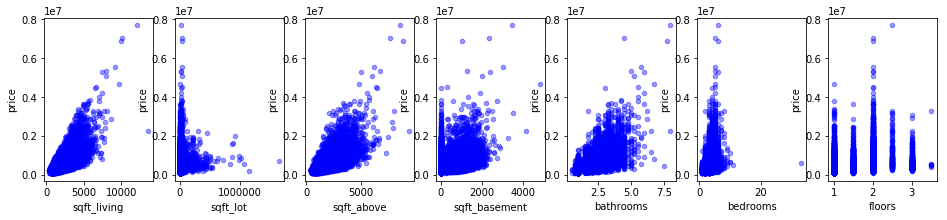

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bathrooms', 'bedrooms','floors'], axes):
    df_cleaned.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [41]:
#see previous comments in categorizing zipcode; decision to use sq_ft_!5 instead
#scatter to see if there's extremes of zipcode vs price
#get the mean price of each property in each zipcode category and plot mean price vs zipcode


## Correlation Matrices:

### Investigating Top Predictors of Price:

In [55]:
#df_cleaned.corr()[['price']].sort_values(by=['price'], ascending=False)
    

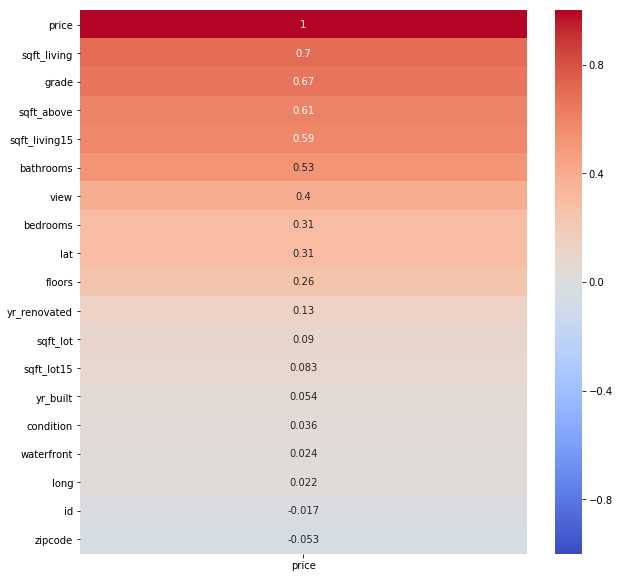

In [42]:
#Plot a heatmap to see where which variables are strongly correlated with target "price"
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr()[['price']].sort_values(by=['price'],ascending=False), vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True)
#from the heatmap below we can see that there are no strong negative correlations, but there are several positive correlations:
#bathrooms, sqft_living, grade, sqft_above, sqft_living15

## Investigating Multicollinearity:

In [43]:
#no correlations above .90 - can assume independence of IVs
#df_cleaned.corr().round(2)


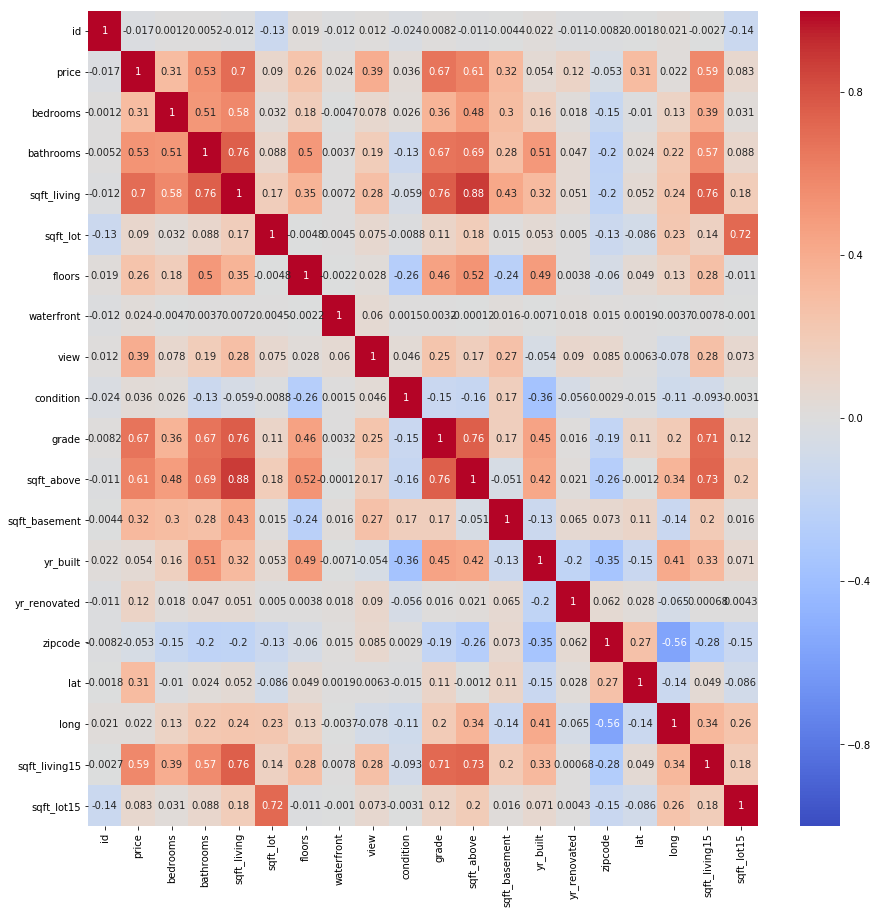

In [44]:
# come back and add a filter for correlation table so zip codes are not displayed
#checking for correlations of .90 or above between IVs 
plt.figure(figsize = (15, 15))
sns.heatmap(df_cleaned.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);



# Building a MLR Model:  

### "How Can Homeowners Improve The Selling Price of their Home?"

####  In order to answer this question, we first categorized the variables in our dataset into two categories: 

#### Uncontrollable: factors which are beyond the homeowners' control
- Geographic: latitude, longitude, zipcode, sqft_living15, waterfront

#### Controllable: factors which homeowners conceivably have the opportunity to improve upon
- Size: sqft_basement, sqft_above, sqft_living, sqft_lot
- Amenities: bathrooms, bedrooms, floors
- Upkeep: grade, condition, yr_renovated

#### Based on examining correlation coefficients and our understanding of the variables' relationships to one another we decided to do use a stepwise approach to building an optimal regression model.

In [45]:
#displaying full list of variables
df_cleaned.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Baseline Model 

In [60]:
#calculating baseline model R^2 = 0.0
import sklearn as sk
df_cleaned['price_pred'] = df_cleaned['price'].mean()
sk.metrics.r2_score(df_cleaned['price'],df_cleaned['price_pred'])

0.0

## Model 0: Baseline Model

In [99]:
X0 = df_cleaned[['price_pred']]
y = df_cleaned[['price']]

model0 = sm.OLS(y, X0).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Wed, 08 May 2019   Prob (F-statistic):                nan
Time:                        08:59:02   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21596   BIC:                         6.148e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price_pred     1.0000      0.005    216.136      0.000       0.991       1.009
==============================================================================
Omnibus:                    19103.129   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131390.146
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.533   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 1: sqft_living

In [47]:
X1

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
5,5420
6,1715
7,1060
8,1780
9,1890


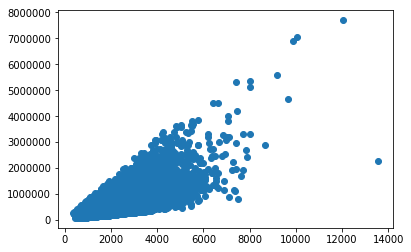

In [48]:
plt.scatter(X1, y)

In [46]:
# setting our dependent and independent variables for Model 1
X1 = df_cleaned[['sqft_living']]
y = df_cleaned[['price']]

# Displaying summary of Model 1 OLS
model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 1.124e+05
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:23:08   Log-Likelihood:            -3.0011e+05
No. Observations:               21597   AIC:                         6.002e+05
Df Residuals:                   21596   BIC:                         6.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1647      0.785    335.319      0.000     261.626     264.703
==============================================================================
Omnibus:                    16021.993   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689028.909
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.955   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# OLD CODE (DIDNT HAVE LABELS OF PREDICTORS)
# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model_1 = sm.OLS(y, predictors_int).fit()    
# model_1.summary()

## Model 2:  sqft_living, grade

In [79]:
X2 = df_cleaned[['sqft_living','grade']]
y = df_cleaned[['price']]

model2 = sm.OLS(y, X2).fit()
model2.summary()

# X2 = df_cleaned[['sqft_living','grade']]
# y = df_cleaned[['price']]

# predictors = np.asarray(X)  
# predictors_int = sm.add_constant(predictors) 

# model = sm.OLS(y, predictors_int).fit()    
# model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 5.626e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:23:29   Log-Likelihood:            -3.0010e+05
No. Observations:               21597   AIC:                         6.002e+05
Df Residuals:                   21595   BIC:                         6.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   253.7150      2.536    100.032      0.000     248.744     258.686
grade        2916.6396    744.441      3.918      0.000    1457.480    4375.799
==============================================================================
Omnibus:                    16538.169   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           765987.905
Skew:                           3.262   Prob(JB):                         0.00
Kurtosis:                      31.437   Cond. No.                         949.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 3: sqft_living, grade, bathrooms

In [91]:
X3 = df_cleaned[['sqft_living', 'grade','bathrooms']]
y = df_cleaned[['price']]

model3 = sm.OLS(y, X3).fit()
model3.summary()
#coef of bathrooms is -ve!!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 3.775e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:47:04   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   272.9209      3.099     88.064      0.000     266.846     278.995
grade        8412.4021    902.079      9.326      0.000    6644.261    1.02e+04
bathrooms   -3.878e+04   3614.867    -10.727      0.000   -4.59e+04   -3.17e+04
==============================================================================
Omnibus:                    16515.882   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767247.605
Skew:                           3.253   Prob(JB):                         0.00
Kurtosis:                      31.465   Cond. No.                     4.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
# NUMBERS SEEM VERY OFF. ALSO NUMBERS DONT AGREE WITH ABOVE, BUT SHOULDNT THEY BE THE SAME?

X3 = df_cleaned[['sqft_living', 'grade','bathrooms']]
y = df_cleaned[['price']]

predictors = np.asarray(X3)  #setting what the predictors are 
predictors_int = sm.add_constant(predictors) #
model = sm.OLS(y, predictors_int).fit()    
model.summary() #look at OLS stats documentation to see if we can pull out coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        10:08:03   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
x1           203.1650      3.339     60.855      0.000     196.621     209.709
x2          1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
x3         -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Because the relationship between bathrooms and price was found to be negative (which doesn't make logical sense), we decided to drop bathrooms from the model and add another feature (bedrooms) into the model 4 below

## Model 4:  sqft_living, grade, bedrooms

In [92]:
X4 = df_cleaned[['sqft_living','grade','bedrooms']]
y = df_cleaned[['price']]

model4 = sm.OLS(y, X4).fit()
model4.summary()

#!Bedrooms coef very -ve

# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model = sm.OLS(y, predictors_int).fit()    
# model.summary() #look at OLS stats documentation to see if we can pull out coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 4.036e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:47:46   Log-Likelihood:            -2.9944e+05
No. Observations:               21597   AIC:                         5.989e+05
Df Residuals:                   21594   BIC:                         5.989e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   283.1082      2.584    109.570      0.000     278.044     288.173
grade        2.799e+04    988.988     28.303      0.000    2.61e+04    2.99e+04
bedrooms    -7.618e+04   2054.003    -37.089      0.000   -8.02e+04   -7.22e+04
==============================================================================
Omnibus:                    15952.252   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692209.747
Skew:                           3.103   Prob(JB):                         0.00
Kurtosis:                      30.032   Cond. No.                     2.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Because the relationship between bedrooms and price was found to be negative (which doesn't make logical sense), we decided to drop bedrooms from the model and add another feature (floors) into the model 5 below

## Model 5:  sqft_living, grade, floors

In [93]:
X5 = df_cleaned[['sqft_living','grade','floors']]
y = df_cleaned[['price']]

model5 = sm.OLS(y, X5).fit()
model5.summary()

#!Floors coef -ve

# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model = sm.OLS(y, predictors_int).fit()    
# model.summary() #look at OLS stats documentation to see if we can pull out coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 3.775e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:48:02   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   254.4340      2.531    100.544      0.000     249.474     259.394
grade        1.048e+04   1024.768     10.229      0.000    8473.401    1.25e+04
floors      -3.973e+04   3709.191    -10.711      0.000    -4.7e+04   -3.25e+04
==============================================================================
Omnibus:                    16425.568   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           749903.221
Skew:                           3.232   Prob(JB):                         0.00
Kurtosis:                      31.135   Cond. No.                     4.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 6: note: explored with diff. variable iterations, none of which worked. Not including in chart.

In [94]:
X6 = df_cleaned[['sqft_living','grade','sqft_lot']]
y = df_cleaned[['price']]

model6 = sm.OLS(y, X6).fit()
model6.summary()

#sqft_lot seems to have no impact.  (very small coefficient)

# predictors = np.asarray(X)  #setting what the predictors are 
# predictors_int = sm.add_constant(predictors) #
# model = sm.OLS(y, predictors_int).fit()    
# model.summary() #look at OLS stats documentation to see if we can pull out coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 3.759e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:48:37   Log-Likelihood:            -3.0008e+05
No. Observations:               21597   AIC:                         6.002e+05
Df Residuals:                   21594   BIC:                         6.002e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   256.1050      2.561    100.015      0.000     251.086     261.124
grade        2821.2997    743.882      3.793      0.000    1363.237    4279.362
sqft_lot       -0.2831      0.044     -6.478      0.000      -0.369      -0.197
==============================================================================
Omnibus:                    16465.053   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           753914.508
Skew:                           3.243   Prob(JB):                         0.00
Kurtosis:                      31.209   Cond. No.                     1.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 7:  sqft_living, grade, floors, bathrooms, bedrooms, sqft_lot

In [95]:
X7 = df_cleaned[['sqft_living','grade', 'floors', 'bathrooms', 'bedrooms', 'sqft_lot']]
y = df_cleaned[['price']]

model7 = sm.OLS(y, X7).fit()
model7.summary()

#highest R^2 BUT
# p value of bathrooms is too high?
# coef of bathrooms is MASSIVELY -ve
# coef of sqft_lot still very low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.042e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:50:31   Log-Likelihood:            -2.9933e+05
No. Observations:               21597   AIC:                         5.987e+05
Df Residuals:                   21591   BIC:                         5.987e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   290.6676      3.122     93.109      0.000     284.549     296.787
grade        3.658e+04   1211.433     30.194      0.000    3.42e+04     3.9e+04
floors      -4.004e+04   3830.256    -10.453      0.000   -4.75e+04   -3.25e+04
bathrooms   -5811.7359   3781.411     -1.537      0.124   -1.32e+04    1600.109
bedrooms    -7.704e+04   2079.967    -37.039      0.000   -8.11e+04    -7.3e+04
sqft_lot       -0.4293      0.042    -10.122      0.000      -0.512      -0.346
==============================================================================
Omnibus:                    15738.592   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           662984.544
Skew:                           3.049   Prob(JB):                         0.00
Kurtosis:                      29.449   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 8:  sqft_living, grade, bathrooms, 

In [101]:
X8 = df_cleaned[['sqft_living','grade', 'bathrooms']]
y = df_cleaned[['price']]

model8 = sm.OLS(y, X8).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 3.775e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        09:02:28   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   272.9209      3.099     88.064      0.000     266.846     278.995
grade        8412.4021    902.079      9.326      0.000    6644.261    1.02e+04
bathrooms   -3.878e+04   3614.867    -10.727      0.000   -4.59e+04   -3.17e+04
==============================================================================
Omnibus:                    16515.882   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           767247.605
Skew:                           3.253   Prob(JB):                         0.00
Kurtosis:                      31.465   Cond. No.                     4.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 9:  sqft_above, sqft_ basement, grade, floors, bathrooms, bedrooms

In [100]:
X9 = df_cleaned[['sqft_above', 'sqft_basement', 'grade', 'floors', 'bathrooms', 'bedrooms']]
y = df_cleaned[['price']]

model9 = sm.OLS(y, X9).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:59:52   Log-Likelihood:            -2.9941e+05
No. Observations:               21597   AIC:                         5.988e+05
Df Residuals:                   21591   BIC:                         5.989e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_above      274.4833      3.263     84.109      0.000     268.087     280.880
sqft_basement   310.4285      4.949     62.725      0.000     300.728     320.129
grade          3.596e+04   1213.040     29.647      0.000    3.36e+04    3.83e+04
floors        -2.811e+04   4248.782     -6.617      0.000   -3.64e+04   -1.98e+04
bathrooms     -3847.4583   3805.113     -1.011      0.312   -1.13e+04    3610.845
bedrooms      -7.649e+04   2096.142    -36.490      0.000   -8.06e+04   -7.24e+04
==============================================================================
Omnibus:                    15898.851   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           685896.731
Skew:                           3.089   Prob(JB):                         0.00
Kurtosis:                      29.908   Cond. No.                     5.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Training and Testing Our Model Using K-Fold Cross-Validation:

### Decided to test Model 2 with sqft_living and grade, based on R^2 and coefficents

In [69]:
X = df_cleaned[['sqft_living','grade']]
y = df_cleaned[['price']]

predictors = np.asarray(X)  
predictors_int = sm.add_constant(predictors) 
model = sm.OLS(y, predictors_int).fit()    
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Wed, 08 May 2019   Prob (F-statistic):               0.00
Time:                        08:16:52   Log-Likelihood:            -2.9913e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21594   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.028e+05   1.33e+04    -45.181      0.000   -6.29e+05   -5.77e+05
x1           184.1215      2.872     64.102      0.000     178.491     189.751
x2          9.925e+04   2247.784     44.155      0.000    9.48e+04    1.04e+05
==============================================================================
Omnibus:                    16960.955   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005795.090
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.773   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#setting up the train/test splits for cross-validating our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [71]:
#preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [72]:
#Fit the model and apply the model to the make test set predictions 
linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [73]:
#Calculate the residuals and the mean squared error
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)**0.5
test_mse  
#test_mse results indicate our residuals are, on average, a distance of
#$240,450 from the fitted line


246586.3272302087

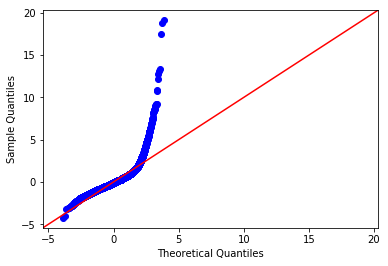

In [74]:
#Residual Plot:
#qq plots show 
residuals = model.resid
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()

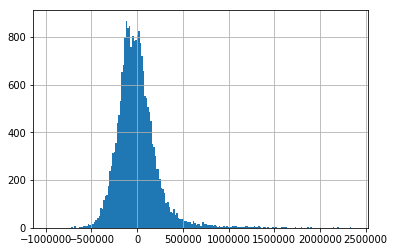

In [103]:
residuals.hist(bins=200)


# Summary of Findings